In [1]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
# 加载MNIST数据集
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [3]:
# 变形
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
# 归一
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
# 拆分
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.5, random_state = 42)
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

(30000, 784) (30000,) (30000, 784) (30000,)


In [4]:
# 定义Keras的Sequential API模型
model1 = keras.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(784,)),
    keras.layers.Dense(10, activation='softmax')
])
model2 = keras.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(784,)),
    keras.layers.Dense(10, activation='softmax')
])
model3 = keras.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(784,)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])
model4 = keras.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(784,), kernel_regularizer=keras.regularizers.l1(0.01)),
    keras.layers.Dense(10, activation='softmax')
])
model5 = keras.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(784,), kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(10, activation='softmax')
])
model6 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28, 1)), 
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [5]:
# 编译模型
model1.compile(
    optimizer='sgd',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model2.compile(
    optimizer='sgd',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model3.compile(
    optimizer='sgd',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model4.compile(
    optimizer='sgd',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model5.compile(
    optimizer='sgd',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model6.compile(
    optimizer='sgd',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)



In [6]:
# 数据增强
data_augmentation = keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)

In [7]:
# 早停
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [8]:
# 训练模型
history1 = model1.fit(
    x_train, y_train,
    epochs=10,
    validation_data=(x_val, y_val),
    batch_size=32
)

Epoch 1/10
938/938 [==============================] - 5s 5ms/step - loss: 0.8119 - accuracy: 0.8139 - val_loss: 0.4606 - val_accuracy: 0.8830
Epoch 2/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3971 - accuracy: 0.8952 - val_loss: 0.3674 - val_accuracy: 0.9007
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3352 - accuracy: 0.9084 - val_loss: 0.3267 - val_accuracy: 0.9097
Epoch 4/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3028 - accuracy: 0.9152 - val_loss: 0.3042 - val_accuracy: 0.9156
Epoch 5/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2795 - accuracy: 0.9212 - val_loss: 0.2850 - val_accuracy: 0.9211
Epoch 6/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2610 - accuracy: 0.9279 - val_loss: 0.2686 - val_accuracy: 0.9258
Epoch 7/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2456 - accuracy: 0.9320 - val_loss: 0.2582 - val_accuracy: 0.9279
Epoch 

In [9]:
history2 = model2.fit(
    x_train, y_train,
    epochs=10,
    validation_data=(x_val, y_val),
    batch_size=32,
    callbacks=[early_stopping]
)

Epoch 1/10
938/938 [==============================] - 5s 5ms/step - loss: 0.8020 - accuracy: 0.8140 - val_loss: 0.4656 - val_accuracy: 0.8769
Epoch 2/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3993 - accuracy: 0.8923 - val_loss: 0.3679 - val_accuracy: 0.9007
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3369 - accuracy: 0.9060 - val_loss: 0.3272 - val_accuracy: 0.9095
Epoch 4/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3033 - accuracy: 0.9162 - val_loss: 0.3024 - val_accuracy: 0.9164
Epoch 5/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2799 - accuracy: 0.9223 - val_loss: 0.2835 - val_accuracy: 0.9209
Epoch 6/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2614 - accuracy: 0.9273 - val_loss: 0.2697 - val_accuracy: 0.9251
Epoch 7/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2462 - accuracy: 0.9315 - val_loss: 0.2578 - val_accuracy: 0.9282
Epoch 

In [10]:
history3 = model3.fit(
    x_train, y_train,
    epochs=10,
    validation_data=(x_val, y_val),
    batch_size=32
)

Epoch 1/10
938/938 [==============================] - 5s 5ms/step - loss: 0.8486 - accuracy: 0.7883 - val_loss: 0.4640 - val_accuracy: 0.8797
Epoch 2/10
938/938 [==============================] - 5s 5ms/step - loss: 0.4202 - accuracy: 0.8833 - val_loss: 0.3653 - val_accuracy: 0.9020
Epoch 3/10
938/938 [==============================] - 4s 5ms/step - loss: 0.3571 - accuracy: 0.8983 - val_loss: 0.3239 - val_accuracy: 0.9121
Epoch 4/10
938/938 [==============================] - 17s 18ms/step - loss: 0.3191 - accuracy: 0.9088 - val_loss: 0.2960 - val_accuracy: 0.9190
Epoch 5/10
938/938 [==============================] - 20s 21ms/step - loss: 0.2922 - accuracy: 0.9168 - val_loss: 0.2771 - val_accuracy: 0.9235
Epoch 6/10
938/938 [==============================] - 21s 22ms/step - loss: 0.2709 - accuracy: 0.9225 - val_loss: 0.2615 - val_accuracy: 0.9278
Epoch 7/10
938/938 [==============================] - 21s 22ms/step - loss: 0.2525 - accuracy: 0.9287 - val_loss: 0.2475 - val_accuracy: 0.931

In [11]:
history4 = model4.fit(
    x_train, y_train,
    epochs=10,
    validation_data=(x_val, y_val),
    batch_size=32,
)

Epoch 1/10
938/938 [==============================] - 6s 5ms/step - loss: 35.2339 - accuracy: 0.7525 - val_loss: 2.3988 - val_accuracy: 0.7198
Epoch 2/10
938/938 [==============================] - 5s 5ms/step - loss: 2.1216 - accuracy: 0.7298 - val_loss: 1.9062 - val_accuracy: 0.7542
Epoch 3/10
938/938 [==============================] - 5s 5ms/step - loss: 1.7142 - accuracy: 0.7865 - val_loss: 1.5934 - val_accuracy: 0.8001
Epoch 4/10
938/938 [==============================] - 4s 5ms/step - loss: 1.4963 - accuracy: 0.8123 - val_loss: 1.4674 - val_accuracy: 0.8118
Epoch 5/10
938/938 [==============================] - 4s 5ms/step - loss: 1.3784 - accuracy: 0.8253 - val_loss: 1.3523 - val_accuracy: 0.8259
Epoch 6/10
938/938 [==============================] - 4s 5ms/step - loss: 1.3037 - accuracy: 0.8322 - val_loss: 1.3007 - val_accuracy: 0.8316
Epoch 7/10
938/938 [==============================] - 4s 5ms/step - loss: 1.2511 - accuracy: 0.8393 - val_loss: 1.2368 - val_accuracy: 0.8401
Epoch

In [12]:
history5 = model5.fit(
    x_train, y_train,
    epochs=10,
    validation_data=(x_val, y_val),
    batch_size=32,
)

Epoch 1/10
938/938 [==============================] - 20s 21ms/step - loss: 6.0185 - accuracy: 0.8153 - val_loss: 4.8096 - val_accuracy: 0.8797
Epoch 2/10
938/938 [==============================] - 20s 22ms/step - loss: 4.0566 - accuracy: 0.8915 - val_loss: 3.4128 - val_accuracy: 0.9000
Epoch 3/10
938/938 [==============================] - 18s 19ms/step - loss: 2.9035 - accuracy: 0.9049 - val_loss: 2.4711 - val_accuracy: 0.9077
Epoch 4/10
938/938 [==============================] - 4s 5ms/step - loss: 2.1180 - accuracy: 0.9123 - val_loss: 1.8229 - val_accuracy: 0.9141
Epoch 5/10
938/938 [==============================] - 5s 5ms/step - loss: 1.5776 - accuracy: 0.9172 - val_loss: 1.3809 - val_accuracy: 0.9167
Epoch 6/10
938/938 [==============================] - 4s 5ms/step - loss: 1.2048 - accuracy: 0.9215 - val_loss: 1.0711 - val_accuracy: 0.9195
Epoch 7/10
938/938 [==============================] - 17s 18ms/step - loss: 0.9463 - accuracy: 0.9235 - val_loss: 0.8573 - val_accuracy: 0.922

In [13]:
# 重塑数据以适应ImageDataGenerator
xv_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
xv_val = x_val.reshape(x_val.shape[0], 28, 28, 1)
print(xv_train.shape, xv_val.shape)
history6 = model6.fit(
    data_augmentation.flow(xv_train, y_train, batch_size=32),  
    epochs=10,
    validation_data=(xv_val, y_val), 
    steps_per_epoch=len(xv_train) // 32  
)

(30000, 28, 28, 1) (30000, 28, 28, 1)
Epoch 1/10
937/937 [==============================] - 17s 18ms/step - loss: 1.6238 - accuracy: 0.4938 - val_loss: 0.9667 - val_accuracy: 0.7368
Epoch 2/10
937/937 [==============================] - 11s 11ms/step - loss: 1.2255 - accuracy: 0.6135 - val_loss: 0.8123 - val_accuracy: 0.7804
Epoch 3/10
937/937 [==============================] - 11s 11ms/step - loss: 1.0683 - accuracy: 0.6670 - val_loss: 0.7201 - val_accuracy: 0.8101
Epoch 4/10
937/937 [==============================] - 11s 11ms/step - loss: 0.9471 - accuracy: 0.7112 - val_loss: 0.6519 - val_accuracy: 0.8308
Epoch 5/10
937/937 [==============================] - 18s 19ms/step - loss: 0.8456 - accuracy: 0.7448 - val_loss: 0.6042 - val_accuracy: 0.8451
Epoch 6/10
937/937 [==============================] - 18s 19ms/step - loss: 0.7523 - accuracy: 0.7767 - val_loss: 0.5483 - val_accuracy: 0.8563
Epoch 7/10
937/937 [==============================] - 18s 19ms/step - loss: 0.6953 - accuracy: 0.7

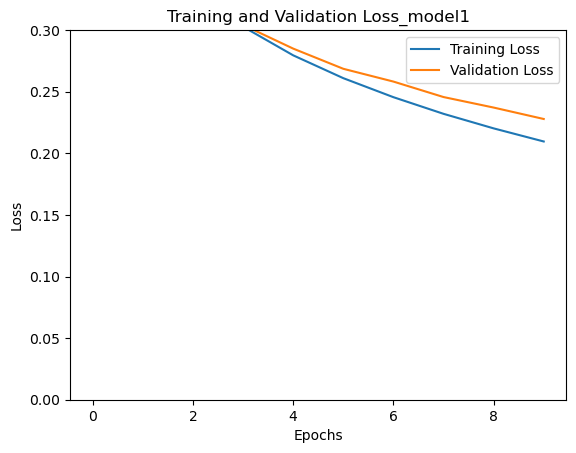

In [14]:
import matplotlib.pyplot as plt
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss_model1')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.ylim(0, 0.3)
plt.show()

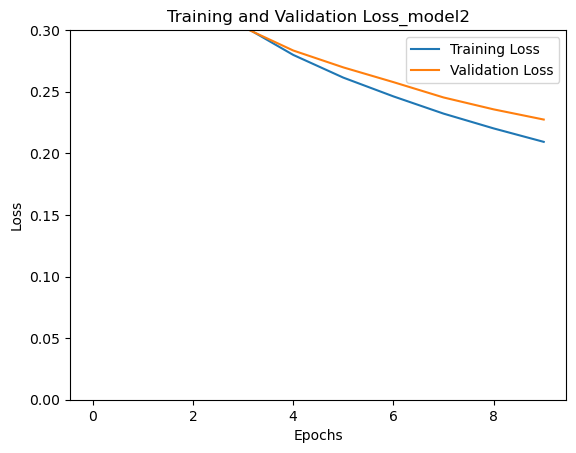

In [15]:
import matplotlib.pyplot as plt
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss_model2')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.ylim(0, 0.3)
plt.show()

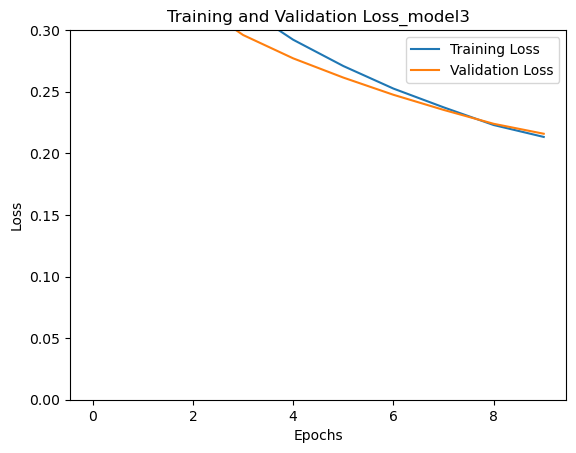

In [16]:
import matplotlib.pyplot as plt
plt.plot(history3.history['loss'], label='Training Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss_model3')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.ylim(0, 0.3)
plt.show()

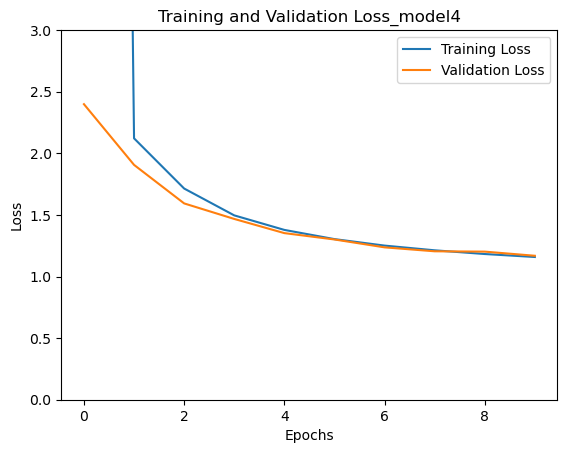

In [17]:
import matplotlib.pyplot as plt
plt.plot(history4.history['loss'], label='Training Loss')
plt.plot(history4.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss_model4')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.ylim(0, 3)
plt.show()

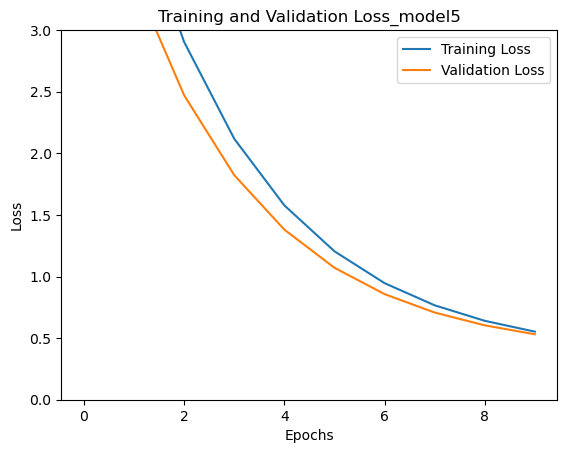

In [24]:
import matplotlib.pyplot as plt
plt.plot(history5.history['loss'], label='Training Loss')
plt.plot(history5.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss_model5')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.ylim(0, 3)
plt.show()

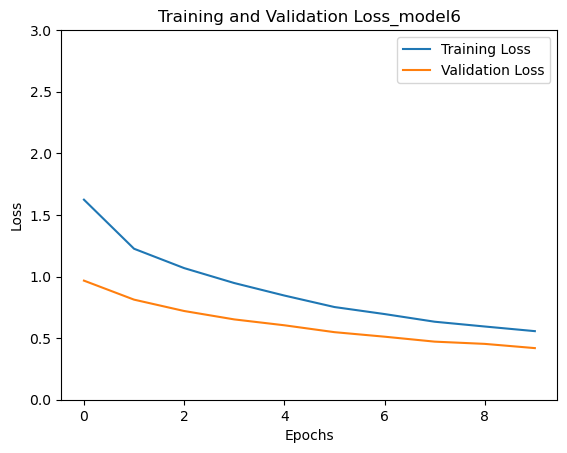

In [25]:
import matplotlib.pyplot as plt
plt.plot(history6.history['loss'], label='Training Loss')
plt.plot(history6.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss_model6')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.ylim(0, 3)
plt.show()